# 02 — Exploratory Data Analysis (EDA)

This notebook explores the cleaned Formula 1 dataset to understand patterns, trends, and relationships that influence race outcomes and podium finishes.

- Driver performance trends  
- Constructor dominance  
- Qualifying vs race performance  
- Circuit characteristics  
- Feature distributions and correlations  

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [105]:
df = pd.read_csv("../data/processed/f1_cleaned_dataset.csv")
df.head()

C:\Users\leebe\AppData\Local\Temp\ipykernel_15524\1265144146.py:1: DtypeWarning: Columns (4,14,19,37,47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/processed/f1_cleaned_dataset.csv")


,resultid,raceid,driverid,constructorid,race_number,qualifying_position,position,positiontext,race_position,points_x,...,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driver_age,driver_experience
0,371,36,1,1,2,4,3,3,3,6.0,...,\N,\N,\N,\N,\N,\N,\N,\N,22.190281,0
1,392,37,1,1,2,4,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,22.247775,1
2,414,38,1,1,2,2,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,22.266940,2
3,436,39,1,1,2,4,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,22.343600,3
4,458,40,1,1,2,2,2,2,2,8.0,...,\N,\N,\N,\N,\N,\N,\N,\N,22.381930,4


## 1. Initial Dataset Overview

- shape
- data types
- missing values
- basic descriptive statistics

In [106]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 71 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   resultid                 26759 non-null  int64  
 1   raceid                   26759 non-null  int64  
 2   driverid                 26759 non-null  int64  
 3   constructorid            26759 non-null  int64  
 4   race_number              26759 non-null  object 
 5   qualifying_position      26759 non-null  int64  
 6   position                 26759 non-null  object 
 7   positiontext             26759 non-null  object 
 8   race_position            26759 non-null  int64  
 9   points_x                 26759 non-null  float64
 10  laps                     26759 non-null  int64  
 11  race_time                26759 non-null  object 
 12  milliseconds             26759 non-null  object 
 13  fastestlap               26759 non-null  object 
 14  rank                  

In [107]:
df.isnull().sum().sort_values(ascending=False).head(20)

championship_years         21257
fastest_laps                 599
pole_positions               599
years_active                 599
points_per_entry             599
constructor_nationality      599
seasons                      599
championships                599
race_entries                 599
race_starts                  599
race_wins                    599
podium_rate                  599
podiums                      599
fastlap_rate                 599
points_y                     599
active                       599
decade                       599
pole_rate                    599
start_rate                   599
champion                     599
dtype: int64

In [108]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
resultid,26759.0,NaN,NaN,NaN,13380.977391,7726.134642,1.0,6690.5,13380.0,20069.5,26764.0
raceid,26759.0,NaN,NaN,NaN,551.687283,313.265036,1.0,300.0,531.0,811.0,1144.0
driverid,26759.0,NaN,NaN,NaN,278.67353,282.703039,1.0,57.0,172.0,399.5,862.0
constructorid,26759.0,NaN,NaN,NaN,50.180537,61.551498,1.0,6.0,25.0,63.0,215.0
race_number,26759.0,188.0,5.0,820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
quali_time,26759,16,\N,25400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sprint_date,26759,19,\N,26399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sprint_time,26759,13,\N,26459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
driver_age,26759.0,NaN,NaN,NaN,29.992963,5.268514,17.453799,26.143737,29.429158,33.292266,58.787132


## 2. Driver Performance Analysis

Starting to explore driver-level trends:
- Age distribution
- Experience distribution
- Podium counts
- Win rates
- Relationship between qualifying and race performance

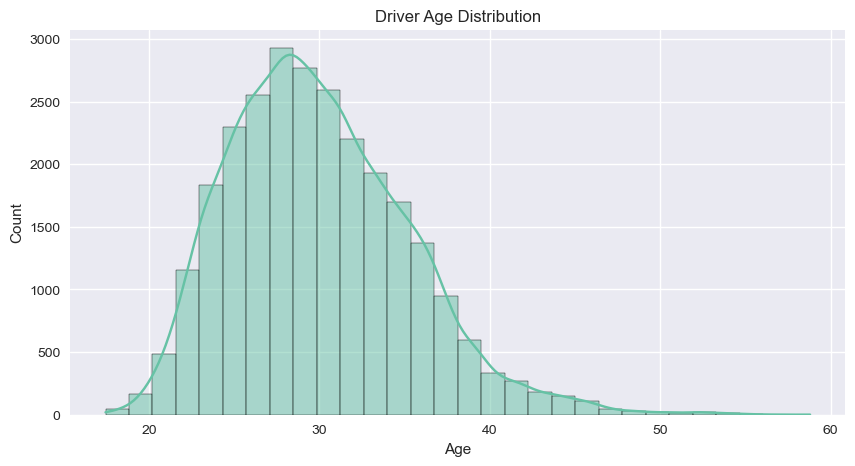

In [109]:
plt.figure(figsize=(10,5))
sns.histplot(df["driver_age"], bins=30, kde=True)
plt.title("Driver Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

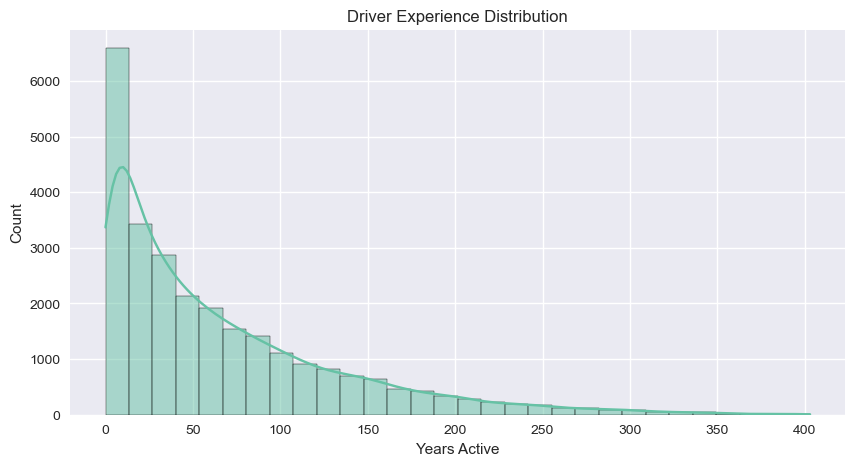

In [110]:
plt.figure(figsize=(10,5))
sns.histplot(df["driver_experience"], bins=30, kde=True)
plt.title("Driver Experience Distribution")
plt.xlabel("Years Active")
plt.ylabel("Count")
plt.show()

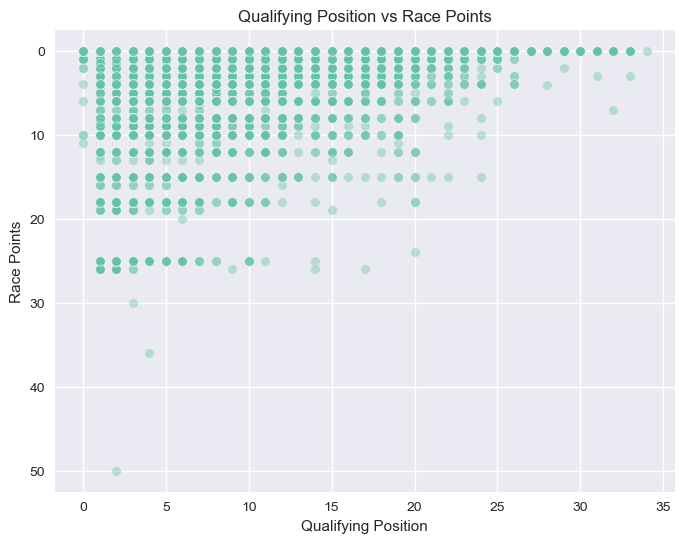

In [111]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="qualifying_position", y="points_x", alpha=0.4)
plt.title("Qualifying Position vs Race Points")
plt.xlabel("Qualifying Position")
plt.ylabel("Race Points")
plt.gca().invert_yaxis()
plt.show()

## 3. Constructor Performance

Explore:
- Constructor win counts
- Constructor podium counts
- Constructor dominance over time

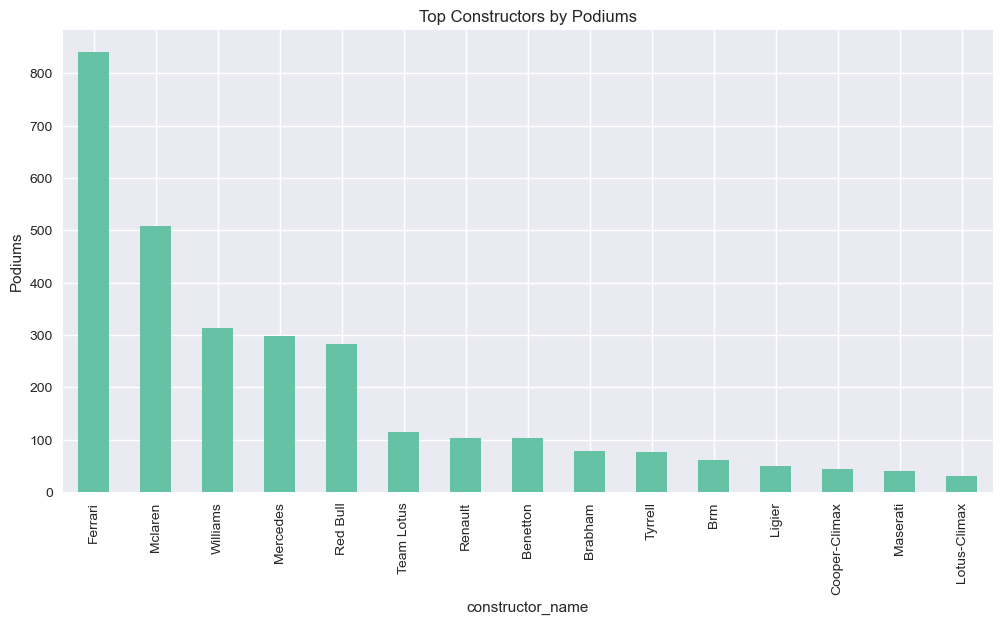

In [123]:
#Used race_position rather than podium finishes to include all top 3 finishes and to avoid nulls and DNS/DNF weirdness

constructor_podiums = (
    df[df["race_position"] <= 3]
    .groupby("constructor_name")
    .size()
    .sort_values(ascending=False)
)

plt.figure(figsize=(12,6))
constructor_podiums.head(15).plot(kind="bar")
plt.title("Top Constructors by Podiums")
plt.ylabel("Podiums")
plt.show()

## 4. Circuit Analysis

Examine:
- Circuits with the most races
- Fastest and Slowest circuits
- Circuits with the highest average speed
- Circuits where qualifying matters most

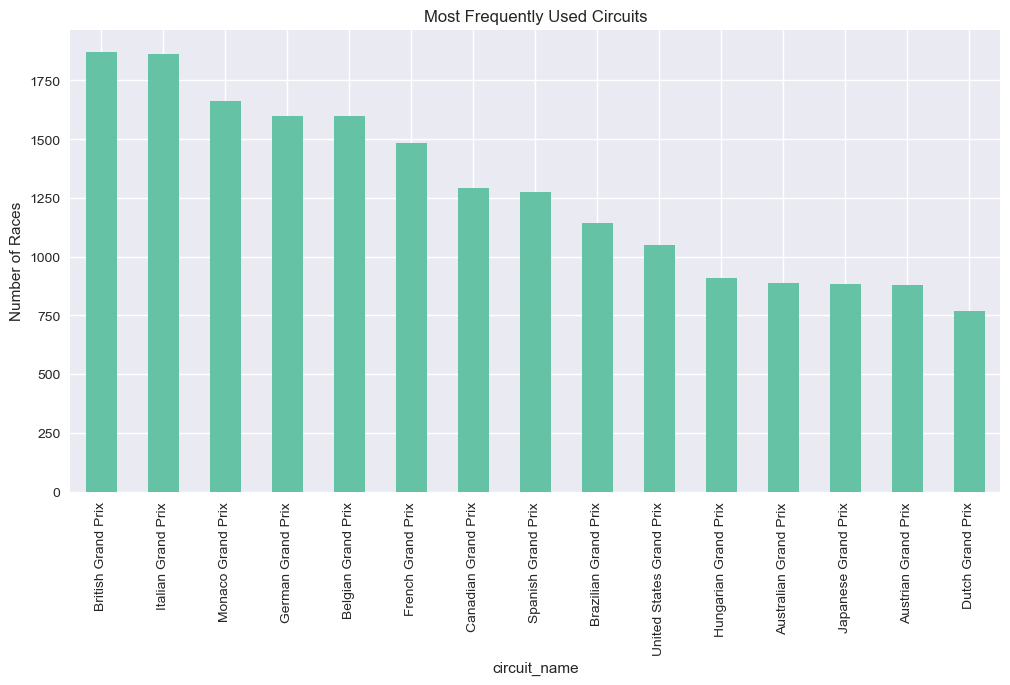

In [113]:
circuit_counts = df.groupby("circuit_name").size().sort_values(ascending=False)

plt.figure(figsize=(12,6))
circuit_counts.head(15).plot(kind="bar")
plt.title("Most Frequently Used Circuits")
plt.ylabel("Number of Races")
plt.show()

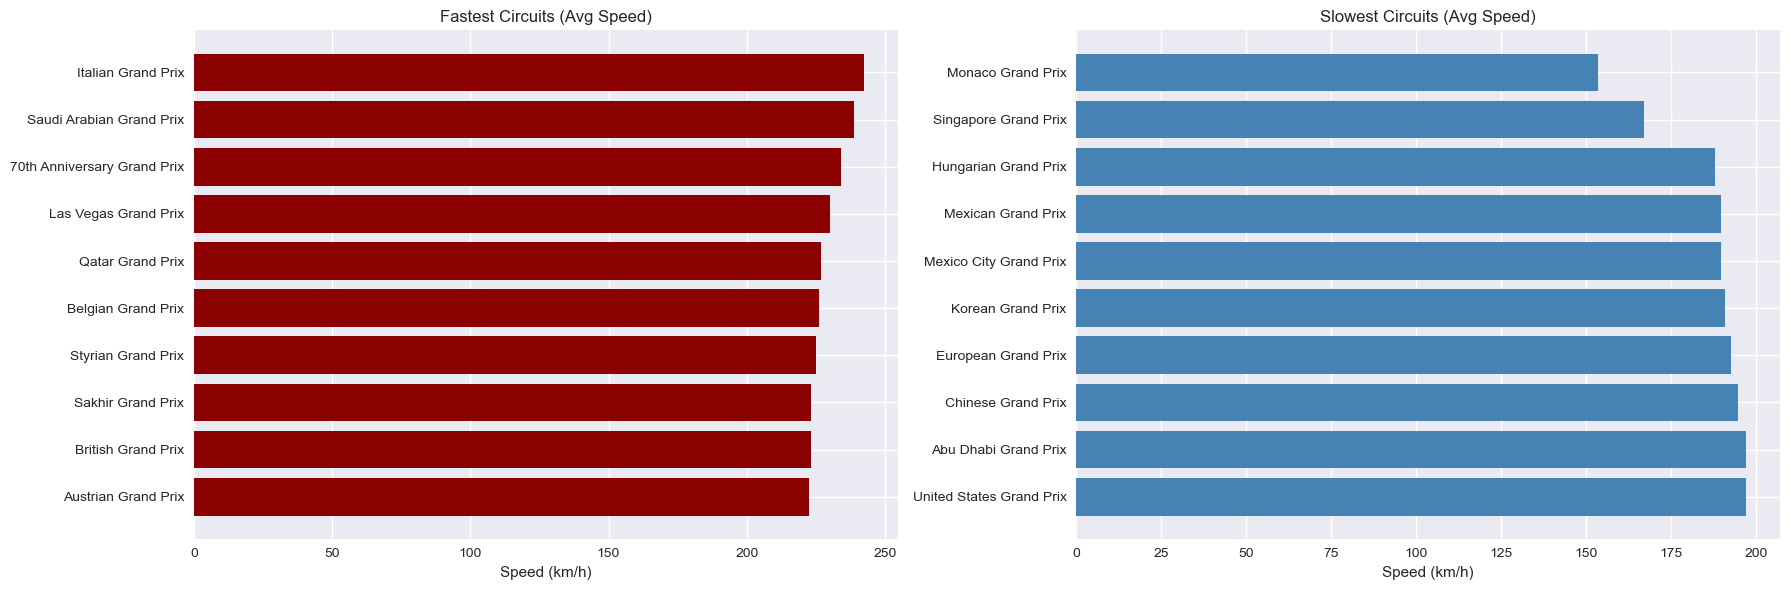

In [121]:
# Convert fastestlapspeed to numeric
df["fastestlapspeed"] = pd.to_numeric(df["fastestlapspeed"], errors="coerce")

# Compute average speed per circuit
avg_speed = (
    df.groupby("circuit_name")["fastestlapspeed"]
      .mean()
      .dropna()
)

# Fastest 10 circuits
fastest = avg_speed.sort_values(ascending=False).head(10)

# Slowest 10 circuits
slowest = avg_speed.sort_values(ascending=True).head(10)

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18,6))

# Fastest
axes[0].barh(fastest.index[::-1], fastest.values[::-1], color="darkred")
axes[0].set_title("Fastest Circuits (Avg Speed)")
axes[0].set_xlabel("Speed (km/h)")

# Slowest
axes[1].barh(slowest.index[::-1], slowest.values[::-1], color="steelblue")
axes[1].set_title("Slowest Circuits (Avg Speed)")
axes[1].set_xlabel("Speed (km/h)")

plt.tight_layout()
plt.show()

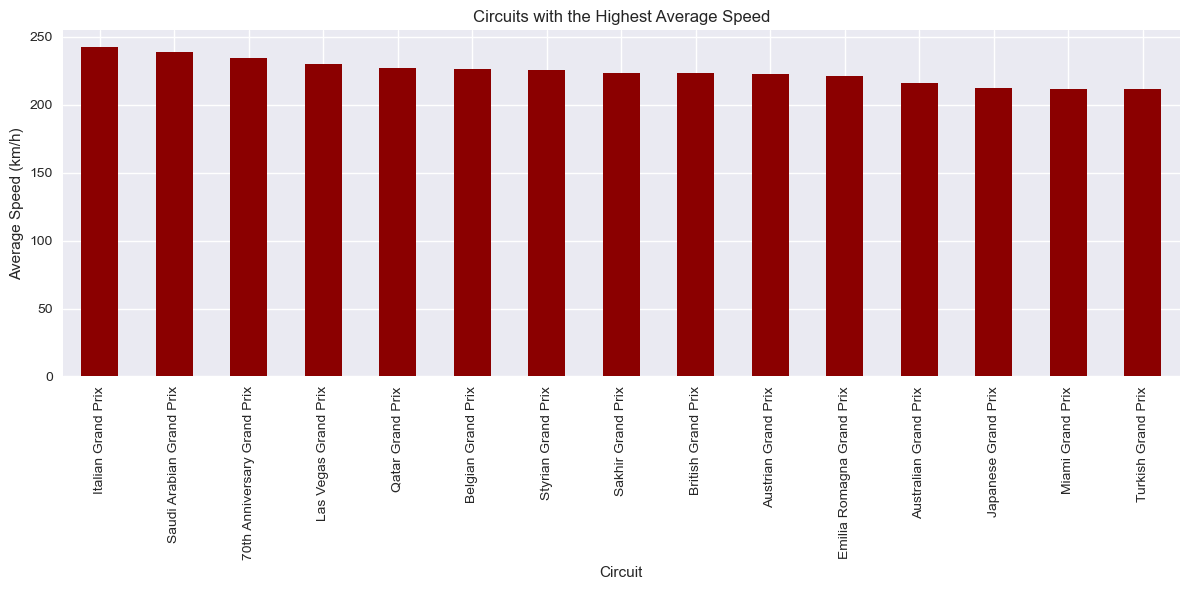

In [119]:
# Convert fastestlapspeed to numeric
df["fastestlapspeed"] = pd.to_numeric(df["fastestlapspeed"], errors="coerce")

# Compute average speed per circuit (fastest first)
fastest_circuit_speed = (
    df.groupby("circuit_name")["fastestlapspeed"]
      .mean()
      .sort_values(ascending=False)
)

# Plot the 15 fastest circuits
plt.figure(figsize=(12,6))
fastest_circuit_speed.head(15).plot(kind="bar", color="darkred")
plt.title("Circuits with the Highest Average Speed")
plt.ylabel("Average Speed (km/h)")
plt.xlabel("Circuit")
plt.tight_layout()
plt.show()

## 5. Correlation Analysis

Check correlations between:
- driver_age
- driver_experience
- qualifying_position
- race_position
- constructor performance metrics


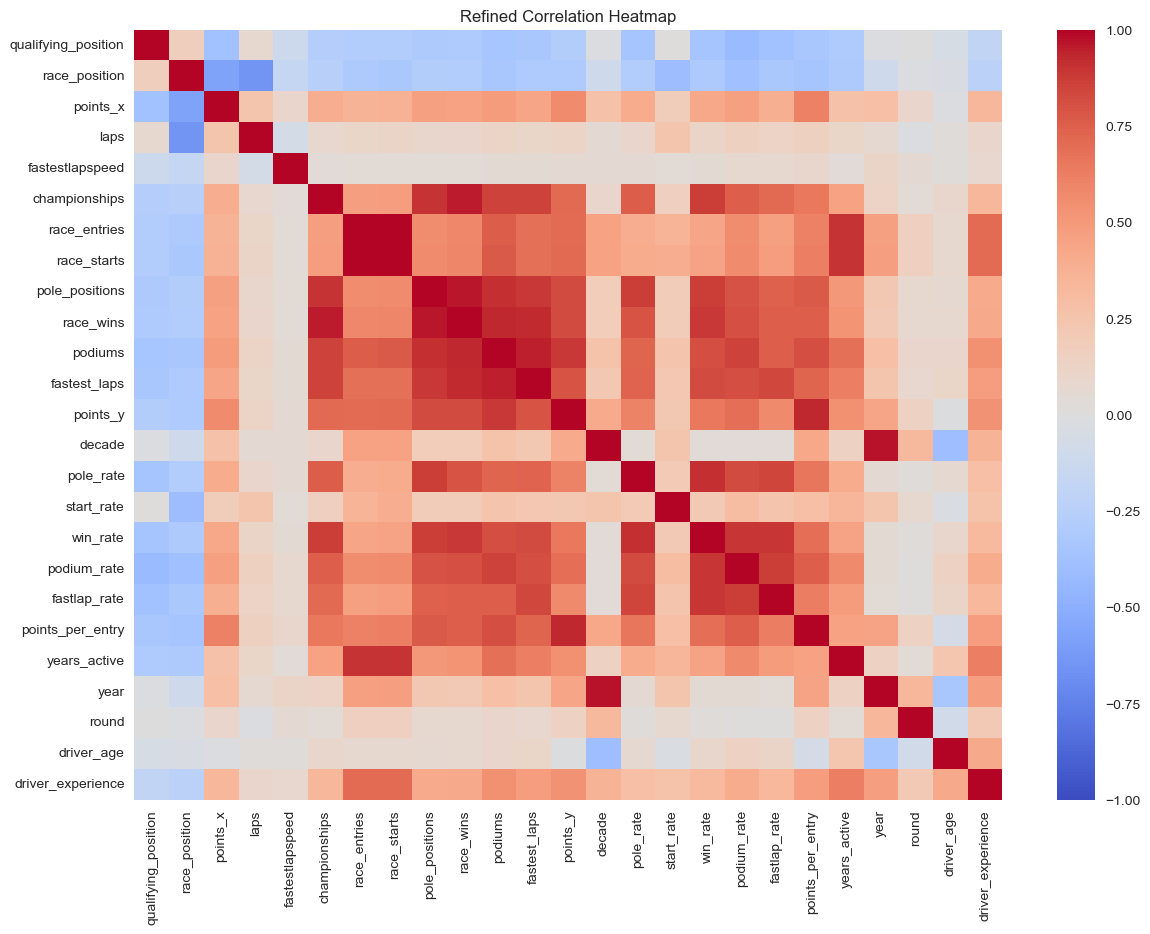

In [124]:
# Drop ID and duplicate-prone columns
drop_cols = ["resultid", "raceid", "driverid", "constructorid", "statusid", "circuitid"]
numeric_df = df.drop(columns=drop_cols).select_dtypes(include=["int64", "float64"])

# Compute and plot correlation matrix
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False, vmin=-1, vmax=1)
plt.title("Refined Correlation Heatmap")
plt.show()

## 6. Key Insights

This section summarises the most important findings from the EDA.

## Correlation Analysis

The correlation heatmap reveals strong interdependencies between key performance metrics. Notably, podiums, wins, and pole positions are highly correlated, suggesting that top-performing drivers and constructors tend to excel across multiple dimensions. 

Rate-based metrics (e.g., win_rate, podium_rate, pole_rate) also show strong alignment, reinforcing their value as consistent indicators of competitive success. 

Additionally, fastest lap rate correlates well with points per entry, highlighting its predictive potential for overall race performance.
